# Introduction
Un système chaotique est un système présentant une sensibilité extrême à ses conditions initiales ce qui signifie qu'une modification même légère des conditions initiales aura une conséquence importante sur l'évolution temporelle du système.

L'objectif de ce mini projet est d'illustrer le comportement d'un système chaotique. 
Le système chaotique que nous choisirons est l'équation logistique. Celle-ci régit l'évolution d'une population. La population étudiée, donc le système choisit, sera une population de lapins. Deux variables sont à prendre en compte, l'augmentation de la population dû aux naissances mais aussi la limite de cette augmentation dû aux ressources alimentaires limitées et aux prédateurs.

# Présentation mathématique du problème
Equation d'évolution de la population de lapins:

$$ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i $$


Equation logistique obtenue gâce à l'introduction de la variable $x_i = n_i / n_{\max}$:

$$ x_{i+1} = r (1-x_i)x_i $$

Fonction correspondante pour étudier cette équation:

$$ f(x) = r (1-x) x $$

On remarque que le seul paramètre est $r$. 

C'est la variation de ce paramètre qui entraîne un comportement chaotique de la suite associée $ x_{i+1} = f(x_i) $

$r$ est compris entre 1 et 4.

# Illustration du comportement d'un système chaotique

## Importation des bibliothèques utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Comportement de la suite

On représente de façon graphique le comportement de la suite pour $r=2.5$ et $x_0=0.1$.

Text(0.5, 1.0, 'Evolution de la proportion du nombre de lapins')

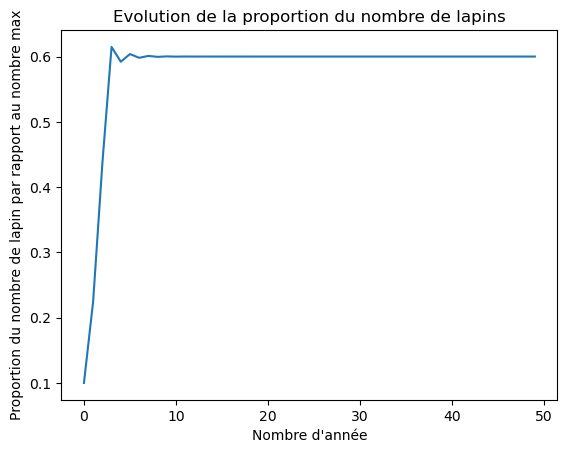

In [2]:
r=2.5
x_0=0.1
pop_lapin=np.empty(50) # création d'un tableau de 50 éléments de valeur aléatoire
pop_lapin[0]=x_0 # on initialise le premier élément qui correspond à la population de lapins à l'année 0

for i in range(49):
    pop_lapin[i+1]=r*(1-pop_lapin[i])*pop_lapin[i] # On remplace les termes aléatoires de la liste par le nombre de lapin de la 1ère année à la 49ème année


nbr_annee=np.arange(0,50,1)
plt.plot(nbr_annee,pop_lapin)
plt.xlabel("Nombre d'année")
plt.ylabel("Proportion du nombre de lapin par rapport au nombre max")
plt.title("Evolution de la proportion du nombre de lapins")

#### On peut remarquer que la suite tend vers une limite finie qui pour $r=2.5$ et $x_0=0.1$ est 0.6

On essaye d'autres valeurs de r pour r comrpris entre 2.5 et 4

Text(0.5, 1.0, 'Evolution de la proportion du nombre de lapins')

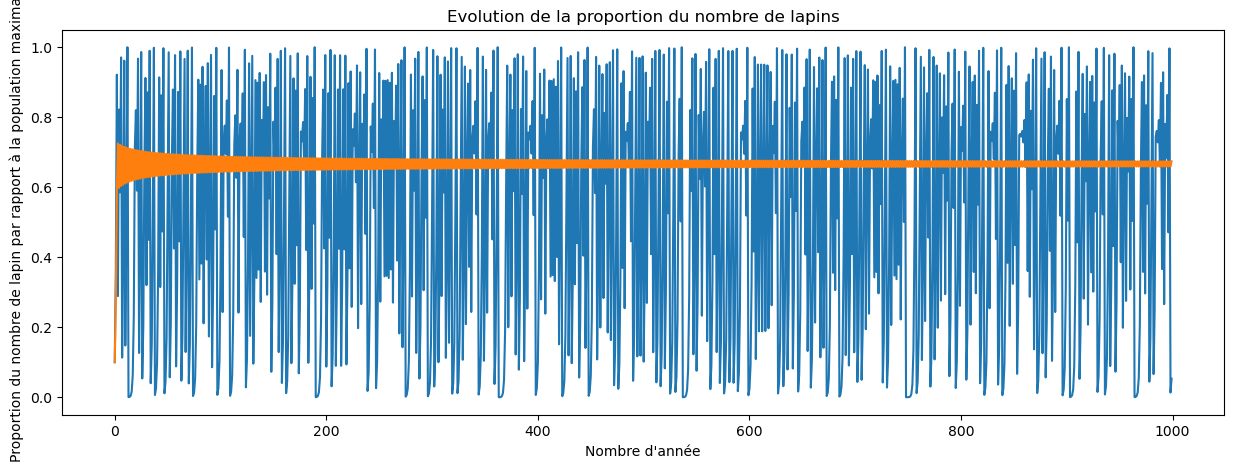

In [3]:
r_a=3
r_b=4
x_0=0.1
pop_lapin_2=np.empty(1000)
pop_lapin_2[0]=x_0

pop_lapin_3=np.empty(1000)
pop_lapin_3[0]=x_0

for i in range(999):
    pop_lapin_2[i+1]=r_a*(1-pop_lapin_2[i])*pop_lapin_2[i] # On remplace les termes aléatoires de la liste par le nombre de lapin de la 1ère année à la 49ème année

for i in range(999):
    pop_lapin_3[i+1]=r_b*(1-pop_lapin_3[i])*pop_lapin_3[i] # On remplace les termes aléatoires de la liste par le nombre de lapin de la 1ère année à la 49ème année

plt.figure(figsize=(15,5))
nbr_annee=np.arange(0,1000,1)
plt.plot(nbr_annee,pop_lapin_3)
plt.plot(nbr_annee,pop_lapin_2)
plt.xlabel("Nombre d'année")
plt.ylabel("Proportion du nombre de lapin par rapport à la population maximale")
plt.title("Evolution de la proportion du nombre de lapins")

#### On peut remarquer graphiquement que pour r=3, la proportion de la population par rapport à la valeur maximale tend vers une limite finie qui est supérieur à celle de r=2.5 sauf qu'on l'atteint en plus d'années.

#### Pour r=4 on ne la remarque pas sur le graphe dû au comportement chaotique de la suite. Le paramètre est plus grand d'une unité par rapport au précédent ce qui entraîne une modification considérable du comportement de la suite.


#### On peut donc supposer que plus r est grand, plus la limite, si elle existe est atteinte en un plus grand nombre d'année.

## Diagramme de bifurcation

On souhaite étudier la limite (lorsqu'elle existe) de la suite des $x_i$ définie par l'équation logistique. Plus précisément, on souhaite étudier la manière dont cette limite dépend de la valeur de $r$.

Pour cela, on créer un diagramme de bifurcation.

Text(0.5, 1.0, 'Diagramme de bifurcation')

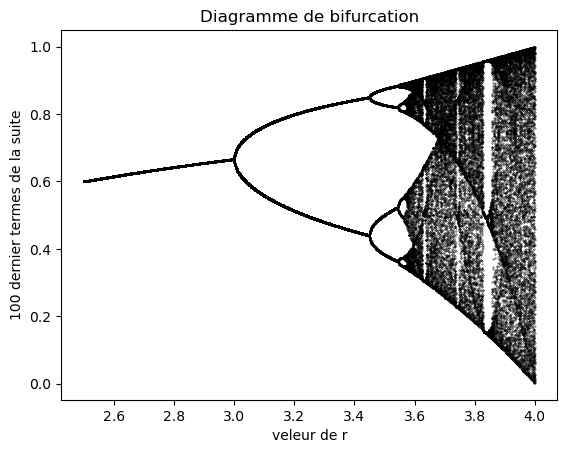

In [5]:
x_0=0.00001  #proportion de la population initiale par rapport à la population maximale

r_liste=[]
lapin_liste=[]

np_lapin=np.empty(1000)
np_lapin[0]=x_0

for r in np.linspace(2.5,4,1000): #On prend 1000 valeurs de r
    for i in range(999): # on calcul le nombre de lapin pour chaque valeurs de r
        np_lapin[i+1]=r*(1-np_lapin[i])*np_lapin[i]
    for x in np_lapin[-100:]:
        lapin_liste.append(x) # on ajoute les 100 derniers valeurs du nombre de lapin à une liste pour chaque r
        r_liste.append(r) # on associe la valeurs r correspondantes pour chaque valeur du nombre de lapin

plt.plot(r_liste,lapin_liste,'ok',markersize=0.3)
plt.ylabel("100 dernier termes de la suite")
plt.xlabel("veleur de r")
plt.title("Diagramme de bifurcation")

#### On remarque que plus r est grand, plus la population n'a pas une limite fixe, les termes finaux s'éparpillent de plus en plus.
#### De plus, en utilisant différentes valeurs de $x_0$ on remarque que le diagramme de bifurcation est le même, ce qui signifie que la population finale ne dépend pas de la population initiale.

## Exposant de Lyapunov

Nous avons vu plus haut qu'une modification de r même très petite peut entraîner une très forte modification du comportement de la suite. 

Mathématiquement cela signifie que la distance entre deux solutions augmente de manière exponentielle sous la forme $ e^{t \lambda(r)} $

Nous allons calculer $\lambda$ pour différentes valeurs de r sachant que lorsque $\lambda$<0 la suite associée à l'équation logistique est convergente et inversement pour $\lambda$>0.

Text(0.5, 1.0, 'Exposant de Lyapunov')

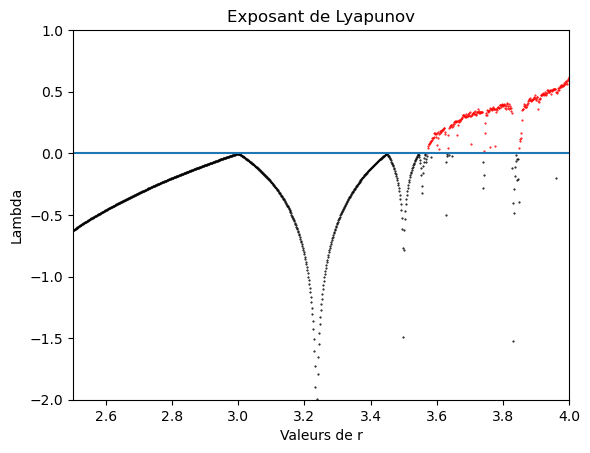

In [6]:
#Constructions des lambda

np_r = np.linspace(2.5, 4, 1000)

x_0=0.00001

lambdaa=[]
log_abs=np.zeros(1000)

for r in np_r: 
    x=x_0 # On initialise x                 
    for i in range(1000):
        x=r*x*(1-x) #On construit les valeurs de x avec les précédentes
        log_abs[i]=np.log(abs(r*(1-2*x)))
    lambdaa.append(np.sum(log_abs[100:])/1000)
    
#Construction du graphe
    
lambda_neg=[] 
lambda_pov=[]

r_neg=[]
r_pov=[]

for i in range(1000):
    if lambdaa[i] < 0:
        lambda_neg.append(lambdaa[i])
        r_neg.append(np_r[i])
    if lambdaa[i]>0:
        lambda_pov.append(lambdaa[i])
        r_pov.append(np_r[i])

plt.plot(r_neg,lambda_neg,'ok',markersize=0.5)
plt.plot(r_pov,lambda_pov,'or',markersize=0.5)
plt.plot(np_r,np.zeros(np_r.shape))
plt.xlim(2.5,4)
plt.ylim(-2,1)
plt.xlabel("Valeurs de r")
plt.ylabel("Lambda")
plt.title("Exposant de Lyapunov")

#### On peut comparer les deux graphes:
#### Le diagramme de bifurcation nous permet de voir comment varie la limite en fonction de la valeur de r tandis que l'exposant de Lyapunov nous permet de voir la convergence ou divergence de la suite associée à l'équation de logistique en fonction de r.
